In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

# Color to Gray Scale Conversion 

In [2]:
color_rose = cv2.imread('Rose.jpg')

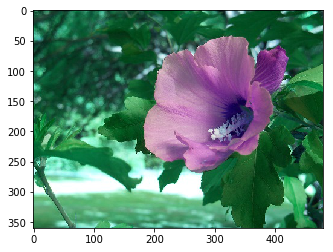

In [3]:
plt.imshow(color_rose)

In [4]:
def bgr_gray(color_gray_img):
    blue  =  color_gray_img[:,:,0]
    green =  color_gray_img[:,:,1]
    red   =  color_gray_img[:,:,2]
    limit = color_gray_img.shape
    t0 = time.time()
    for i in range(limit[0]):
        for j in range(limit[1]):
            color_gray_img[i][j] = (red[i][j]*0.2989) + (green[i][j]*0.5870) + (blue[i][j]*0.1140)
    t1 = time.time()
    proc_time = t1 - t0
    return(color_gray_img,proc_time)

In [5]:
gray_img , proc_time = bgr_gray(color_rose)

In [6]:
gray_img.shape

(360, 480, 3)

1.4790899753570557 (360, 480, 3)


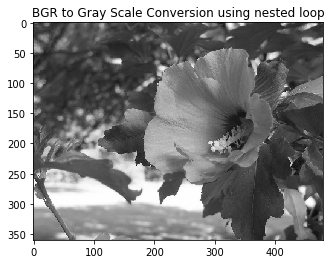

In [7]:
plt.imshow(gray_img)
plt.title('BGR to Gray Scale Conversion using nested loop')
print(proc_time,gray_img.shape)

In [8]:
color_rose_copy = cv2.imread('Rose.jpg')

(360, 480, 3)

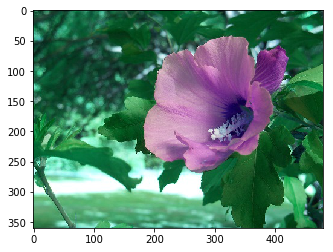

In [9]:
plt.imshow(color_rose_copy)
color_rose_copy.shape

In [10]:
color_rose_copy

array([[[ 25, 105,  62],
        [ 43, 123,  80],
        [ 52, 131,  88],
        ...,
        [ 28,  86,  68],
        [ 58, 107,  93],
        [ 73, 117, 104]],

       [[ 16,  92,  51],
        [ 37, 113,  72],
        [ 54, 130,  89],
        ...,
        [ 38,  87,  73],
        [ 58, 100,  89],
        [ 71, 108,  98]],

       [[ 21,  91,  54],
        [ 21,  91,  54],
        [ 29,  99,  63],
        ...,
        [ 50,  87,  77],
        [ 54,  88,  81],
        [ 57,  88,  81]],

       ...,

       [[ 49, 120,  70],
        [ 48, 119,  69],
        [ 49, 118,  68],
        ...,
        [ 34,  56,  54],
        [ 42,  67,  69],
        [ 51,  80,  84]],

       [[ 46, 114,  67],
        [ 48, 113,  67],
        [ 47, 112,  66],
        ...,
        [ 31,  53,  51],
        [ 40,  68,  69],
        [ 55,  84,  89]],

       [[ 44, 108,  62],
        [ 43, 107,  61],
        [ 43, 107,  61],
        ...,
        [ 30,  50,  51],
        [ 41,  66,  70],
        [ 57,  86,  91]]

In [11]:
def bgr_gray_list(color_gray_img):
    limit = color_gray_img.shape
    t0 = time.time()
    color_gray_img = [[(0.2989*color_gray_img[i][j][2]) + (0.5870*color_gray_img[i][j][1]) + (0.1140*color_gray_img[i][j][0]) for j in range(limit[1])] for i in range(limit[0])]
    t1 = time.time()
    proc_time = t1 - t0
    return(color_gray_img,proc_time)

In [12]:
gray_img_list , proc_time_list = bgr_gray_list(color_rose_copy)

In [13]:
type(gray_img_list)

list

In [14]:
gray_img_list = np.array(gray_img_list)

In [15]:
type(gray_img_list)

numpy.ndarray

In [16]:
gray_img_list = np.reshape(gray_img_list , (360,480))

In [17]:
gray_img_list.shape

(360, 480)

1.3875679969787598 (360, 480)


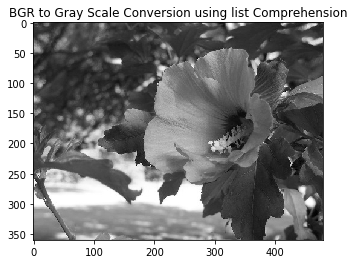

In [18]:
plt.imshow(gray_img_list, cmap='gray')
plt.title('BGR to Gray Scale Conversion using list Comprehension')
print(proc_time_list,gray_img_list.shape)

In [19]:
color_rose_copy2 = cv2.imread('Rose.jpg')

In [20]:
def gray_img_func(color_gray_img):
    t0 = time.time()
    color_gray_img = cv2.cvtColor(color_gray_img,cv2.COLOR_BGR2GRAY)
    t1 = time.time()
    proc_time = t1 - t0 
    return(color_gray_img, proc_time)

In [21]:
gray_img_func , proc_time_func = gray_img_func(color_rose_copy2)

0.0009984970092773438 (360, 480)


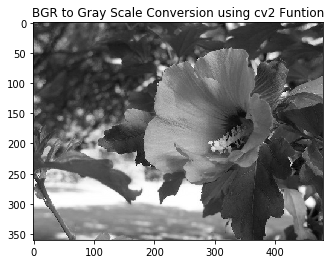

In [22]:
plt.imshow(gray_img_func, cmap='gray')
plt.title('BGR to Gray Scale Conversion using cv2 Funtion')
print(proc_time_func,gray_img_func.shape)

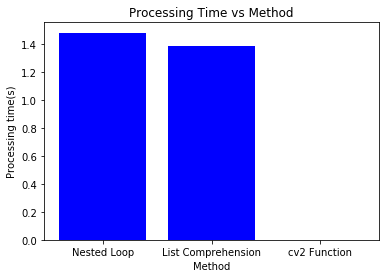

In [23]:
x_axis = ['Nested Loop' , 'List Comprehension' , 'cv2 Function']
y_axis = [proc_time,proc_time_list,proc_time_func]
plt.bar(x_axis,y_axis,color='blue')
plt.xlabel('Method')
plt.ylabel('Processing time(s)')
plt.title('Processing Time vs Method')
plt.show()

# Color to Binary Image

In [24]:
gray_lenna = cv2.imread('lenna.tif',0) 

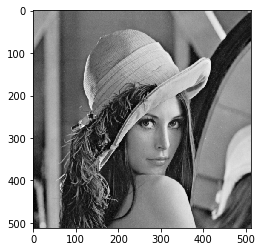

In [25]:
plt.imshow(gray_lenna, cmap='gray')

In [26]:
gray_lenna.shape

(512, 512)

In [27]:
def gray_binary(gray_binary_img):
    limit = gray_binary_img.shape
    t0 = time.time()
    for i in range(limit[0]):
        for j in range(limit[1]):
            if(gray_binary_img[i][j] <= 127):
                gray_binary_img[i][j] = 0
            else:
                gray_binary_img[i][j] = 255
    t1 = time.time()
    proc_time = t1 - t0
    return(gray_binary_img,proc_time)

In [28]:
binary_lenna_img , proc_time1 = gray_binary(gray_lenna)

1.4790899753570557 (512, 512)


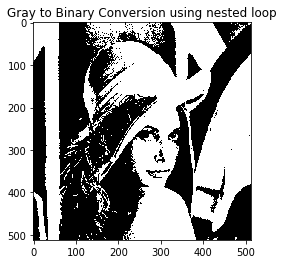

In [29]:
plt.imshow(binary_lenna_img, cmap = 'gray')
plt.title('Gray to Binary Conversion using nested loop')
print(proc_time,binary_lenna_img.shape)

In [30]:
gray_lenna_copy = cv2.imread('lenna.tif',0) 

In [31]:
def gray_binary_list(gray_binary_img):
    limit = gray_binary_img.shape
    t0 = time.time()
    gray_binary_img = [[gray_binary_img[i][j]*0 if(gray_binary_img[i][j]<=127) else 255 for j in range(limit[1])] for i in range(limit[0])]
    t1 = time.time()
    proc_time = t1 - t0
    return(gray_binary_img,proc_time)

In [32]:
binary_img_list , proc_time_list1 = gray_binary_list(gray_lenna_copy)

In [33]:
binary_img_list = np.array(binary_img_list)

In [34]:
binary_img_list = np.reshape(binary_img_list,(512,512))

1.3875679969787598 (512, 512)


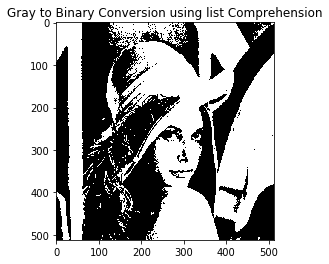

In [35]:
plt.imshow(binary_img_list, cmap = 'gray')
plt.title('Gray to Binary Conversion using list Comprehension')
print(proc_time_list,binary_img_list.shape)

In [36]:
gray_lenna_copy1 = cv2.imread('lenna.tif',0) 

In [37]:
def gray_binary_func(gray_binary_img):
    t0 = time.time()
    ret , gray_binary_img = cv2.threshold(gray_binary_img,127,255,cv2.THRESH_BINARY)
    t1 = time.time()
    proc_time = t1 - t0 
    return(gray_binary_img, proc_time)

In [38]:
binary_img_func , proc_time_func1 = gray_binary_func(gray_lenna_copy1)

0.0009984970092773438 (512, 512)


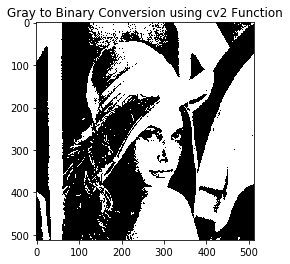

In [39]:
plt.imshow(binary_img_func, cmap = 'gray')
plt.title('Gray to Binary Conversion using cv2 Function')
print(proc_time_func,binary_img_func.shape)

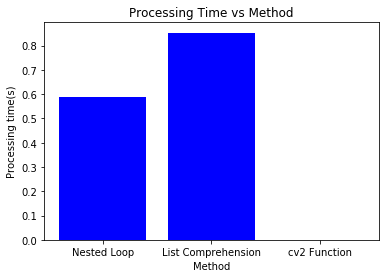

In [40]:
x_axis = ['Nested Loop' , 'List Comprehension' , 'cv2 Function']
y_axis = [proc_time1,proc_time_list1,proc_time_func1]
plt.bar(x_axis,y_axis,color='blue')
plt.xlabel('Method')
plt.ylabel('Processing time(s)')
plt.title('Processing Time vs Method')
plt.show()

# Addition & Subtraction of two Images

In [41]:
img1 = cv2.imread('input1.jpg')
img2 = cv2.imread('input2.jpg')

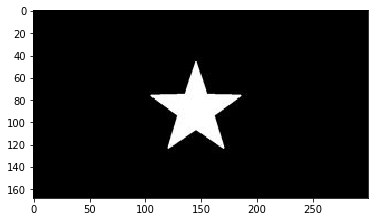

In [42]:
plt.imshow(img1)

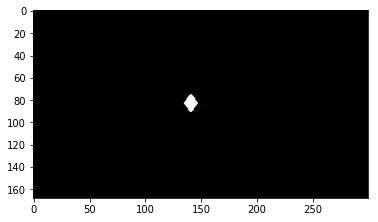

In [43]:
plt.imshow(img2)

In [44]:
img1.shape

(168, 300, 3)

In [45]:
img2.shape

(168, 300, 3)

In [46]:
def additon(img_1,img_2):
    limit = img_1.shape
    img_add = np.full(limit,0)
    t0 = time.time()
    for i in range(limit[0]):
        for j in range(limit[1]):
            img_add[i][j] = img_1[i][j] + img_2[i][j]
    t1 = time.time()
    proc_time = t1 - t0
    return(img_add,proc_time)

In [47]:
add_img , proc_time2 = additon(img1,img2)

0.0857691764831543 (168, 300, 3)


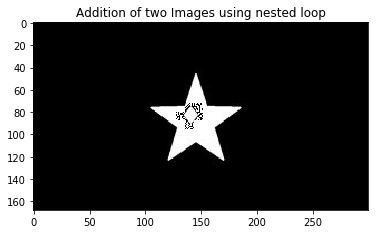

In [48]:
plt.imshow(add_img, cmap = 'gray')
plt.title('Addition of two Images using nested loop')
print(proc_time2,add_img.shape)

In [49]:
img1_copy = cv2.imread('input1.jpg')
img2_copy = cv2.imread('input2.jpg')

In [50]:
def addition_list(img_1,img_2):
    limit = img_1.shape
    img_add = np.full(limit,0)
    t0 = time.time()
    img_add = [[img_1[i][j] + img_2[i][j] for j in range(limit[1])] for i in range(limit[0])]
    t1 = time.time()
    proc_time = t1 - t0
    return(img_add,proc_time)

In [51]:
add_img_list , proc_time_list2 = additon(img1_copy,img2_copy)

0.12864398956298828 (168, 300, 3)


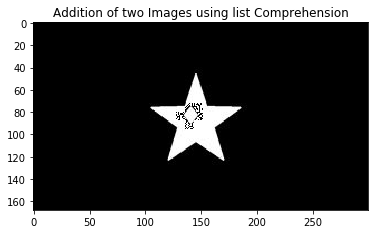

In [52]:
plt.imshow(add_img_list, cmap = 'gray')
plt.title('Addition of two Images using list Comprehension')
print(proc_time_list2,add_img_list.shape)

In [53]:
img1_copy1 = cv2.imread('input1.jpg')
img2_copy1 = cv2.imread('input2.jpg')

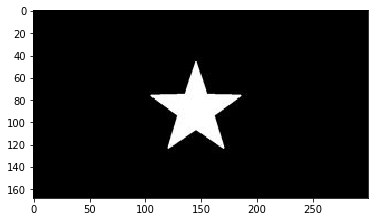

In [54]:
plt.imshow(img1_copy1)

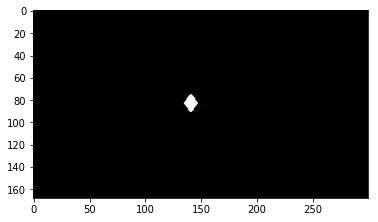

In [55]:
plt.imshow(img2_copy1)

In [56]:
def addition_func(img_1,img_2):
    t0 = time.time()
    img_add = cv2.addWeighted(img_1,1,img_2,1,0)
    t1 = time.time()
    proc_time = t1 - t0 
    return(img_add,proc_time)

In [57]:
addition_func_img , proc_time_func2 = addition_func(img1_copy1,img2_copy1)

In [58]:
addition_func_img.shape

(168, 300, 3)

0.0 (168, 300, 3)


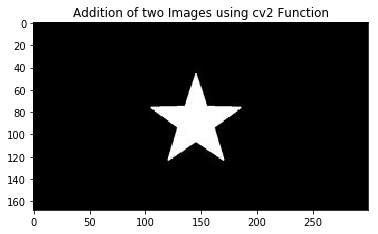

In [59]:
plt.imshow(addition_func_img)
plt.title('Addition of two Images using cv2 Function')
print(proc_time_func2,addition_func_img.shape)

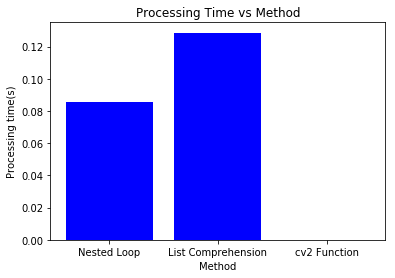

In [60]:
x_axis = ['Nested Loop' , 'List Comprehension' , 'cv2 Function']
y_axis = [proc_time2,proc_time_list2,proc_time_func2]
plt.bar(x_axis,y_axis,color='blue')
plt.xlabel('Method')
plt.ylabel('Processing time(s)')
plt.title('Processing Time vs Method')
plt.show()